## Q.2) Student placement prediction will function by utilizing essential features and historical data. A dataset containing data on student's academic records course progress, extracurricular activities, and previous placement results will be used to train the machine learning system. In order for the model to accurately forecast whether students secure placement. It must learn pattem and correlations from this data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("D:\\Documents\\Internship data\\Data\\05 Input Data\\Prediction of Placement Status Data\\Train Data.csv")
df.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status,Unnamed: 23
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed,NaN
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed,NaN
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed,NaN
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed,NaN
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed,NaN


In [3]:
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         4894
Ticket Type                                                           0
Attendee #                                                          404
Group                                                              4894
Order Type                                                            0
Currency                                                            404
Total Paid                                                            0
Fees Paid                                                           404
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [4]:
df.drop(['Price Tier','Group','Specify in "Others" (how did you come to know about this event)','How did you come to know about this event?','Unnamed: 23'],axis=1,inplace=True)

In [5]:
df.shape

(4894, 19)

In [6]:
df.drop_duplicates(subset=['Email ID'], inplace=True)

In [7]:
df.shape

(1987, 19)

In [8]:
df['Placement Status'].replace('', np.nan, regex=True,inplace=True)

In [9]:
df['Placement Status']

0           Placed
1       Not placed
2       Not placed
3       Not placed
4           Placed
           ...    
4829           NaN
4831           NaN
4832           NaN
4834           NaN
4836           NaN
Name: Placement Status, Length: 1987, dtype: object

C:\Users\Ekta\AppData\Local\Temp\ipykernel_2724\2675502043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


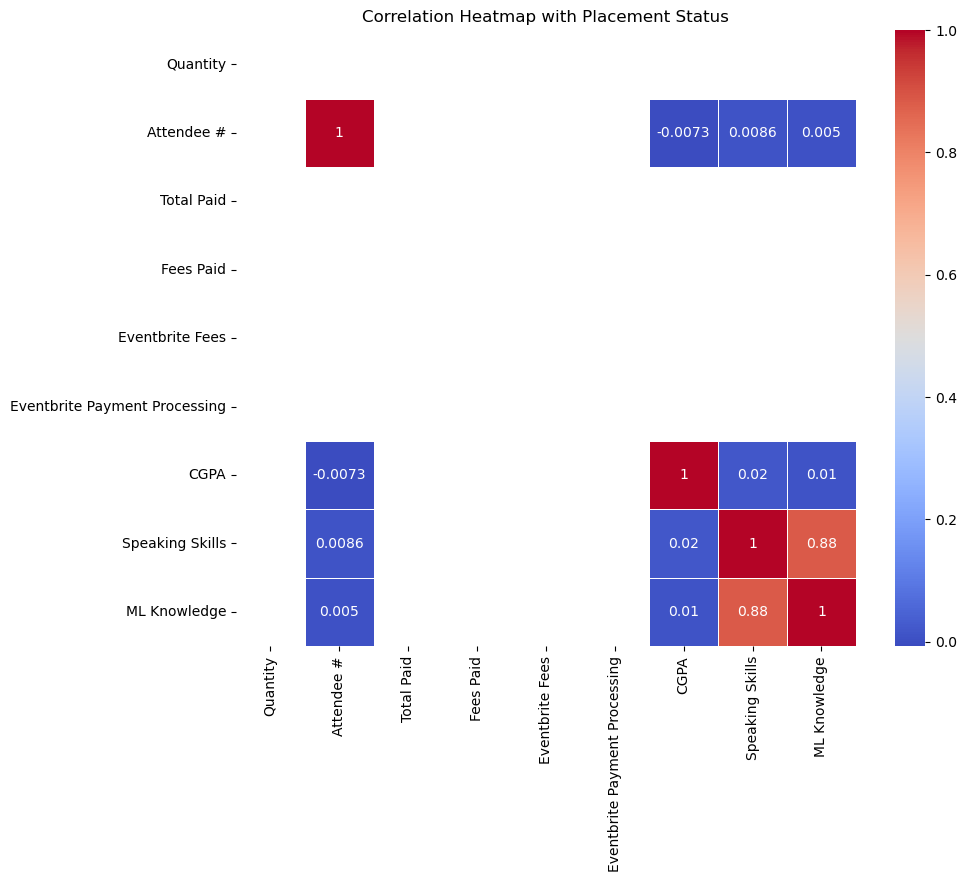

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Placement Status')
plt.show()

In [11]:
val=['College Name','Placement Status']
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in val: 
     df[i]=label_encoder.fit_transform(df[i])

In [12]:
df['Placement Status']

0       1
1       0
2       0
3       0
4       1
       ..
4829    2
4831    2
4832    2
4834    2
4836    2
Name: Placement Status, Length: 1987, dtype: int32

In [13]:
col=['College Name']
for i in col:
     if df[i].isnull().sum()!=0: 
             df[i].fillna(df[i].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

First Name                          0
Email ID                            0
Quantity                            0
Ticket Type                         0
Attendee #                        222
Order Type                          0
Currency                          222
Total Paid                          0
Fees Paid                         222
Eventbrite Fees                     0
Eventbrite Payment Processing       0
Attendee Status                     0
College Name                        0
Designation                         0
Year of Graduation               1707
CGPA                                0
Speaking Skills                     0
ML Knowledge                        0
Placement Status                    0
dtype: int64

In [15]:
factors=['ML Knowledge','CGPA','Speaking Skills','College Name']

In [16]:
X=df[factors]
y=df['Placement Status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

In [24]:
accuracy_score(y_train, y_pred_train),accuracy_score(y_test, y_pred_test)

(0.9502831969792322, 0.6256281407035176)

In [25]:
from xgboost import XGBClassifier
seed = 0
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.83%


In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7412060301507538

In [27]:
test_df = pd.read_csv("D:\\Documents\\Internship data\\Data\\05 Input Data\\Prediction of Placement Status Data\\Test Data.csv")

In [28]:
test_df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         3796
Ticket Type                                                           0
Attendee #                                                            2
Group                                                              3796
Order Type                                                            0
Currency                                                              2
Total Paid                                                            0
Fees Paid                                                             2
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [29]:
test_df.drop(['Price Tier','Group','Specify in "Others" (how did you come to know about this event)','How did you come to know about this event?'],axis=1,inplace=True)

In [30]:
test_df.shape

(3796, 19)

In [31]:
test_df.drop_duplicates(subset=['Email ID'], inplace=True)

In [32]:
test_df.shape

(2321, 19)

In [33]:
test_df.isnull().sum()

First Name                          0
Email ID                            0
Quantity                            0
Ticket Type                         0
Attendee #                          0
Order Type                          0
Currency                            0
Total Paid                          0
Fees Paid                           0
Eventbrite Fees                     0
Eventbrite Payment Processing       0
Attendee Status                     0
College Name                        1
Designation                         0
Year of Graduation               1832
CGPA                                0
Speaking Skills                     0
ML Knowledge                        0
Placement Status                 2321
dtype: int64

In [34]:
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual','Predicted'])

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,0,2
4,1,2
...,...,...
393,0,2
394,2,2
395,2,1
396,2,2


In [35]:
col=['College Name']
for i in col:
     if test_df[i].isnull().sum()!=0: 
             df[i].fillna(test_df[i].mode()[0], inplace=True)

In [36]:
val=['College Name']
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in val: 
     test_df[i]=label_encoder.fit_transform(test_df[i])

In [37]:
test=test_df[['ML Knowledge','CGPA','Speaking Skills','College Name']]
test.head(5)

,ML Knowledge,CGPA,Speaking Skills,College Name
0,3,7.8,3,49
1,3,9.1,3,41
2,2,6.9,2,27
3,4,8.4,4,53
4,5,6.7,5,39


In [38]:
y_pred = rf_classifier.predict(test)
y_pred[:100]

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
xgb=model.predict(test)
xgb[:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [42]:
knn=clf.predict(test)
knn[:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
test_df['Placement Status'] = y_pred

In [44]:
test_df['Placement Status'].replace(2, np.nan, regex=True,inplace=True)

In [45]:
test_df['Placement Status'][:50]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     0.0
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    0.0
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    1.0
32    NaN
33    NaN
34    NaN
36    NaN
37    NaN
38    NaN
39    0.0
40    NaN
41    NaN
42    NaN
44    NaN
45    NaN
46    1.0
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
Name: Placement Status, dtype: float64

In [46]:
output=test_df[['First Name','Placement Status']]

In [47]:
output.to_csv("D:\\Documents\\Internship data\\Data\\05 Input Data\\Prediction of Placement Status Data\\Test Data_with_predictions.csv", index=False)

## In summary, the Random Forest classifier demonstrated its effectiveness in predicting placement status based on the selected features. Its performance was superior to alternative algorithms like XGBoost and KNN in terms of accuracy